In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv("D:/Airplane/data/CANCELLED_final.csv", index_col=0)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER,OP_UNIQUE_CARRIER,ORIGIN,DEST,DISTANCE,EXTREME_ORIGIN,EXTREME_DEST,...,WindSpeedCategory_DEST,SnowDepthCategory_ORIGIN,SnowDepthCategory_DEST,SnowfallCategory_ORIGIN,SnowfallCategory_DEST,PrecipitationCategory_ORIGIN,PrecipitationCategory_DEST,Timechange_CRS_DEP_Time,Timechange_CRS_ARR_TIME,CANCELLED
0,1,1,1,DL,EV,ATL,ABE,692.0,1,0,...,1,0,3,0,0,0,0,14:05,16:10,0.0
1,1,2,2,DL,EV,ATL,ABE,692.0,0,0,...,1,0,3,0,0,0,0,14:05,16:10,0.0
2,1,2,2,DL,DL,ATL,ABE,692.0,1,0,...,0,0,3,0,0,0,0,20:27,22:30,0.0
3,1,3,3,DL,DL,ATL,ABE,692.0,0,1,...,0,0,0,0,0,0,0,20:30,22:37,0.0
4,1,3,3,DL,EV,ATL,ABE,692.0,0,0,...,0,0,0,0,0,0,0,09:15,11:19,0.0


In [3]:
column_dtype = df['Timechange_CRS_DEP_Time'].dtype
print("Data type of ARR_DELAY:", column_dtype)


Data type of ARR_DELAY: object


In [3]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST', 'Timechange_CRS_DEP_Time',
       'Timechange_CRS_ARR_TIME', 'CANCELLED'],
      dtype='object')

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

os.chdir(r"D:/Airplane/data")
alldata = df
sampled_data = alldata.sample(frac=0.1, random_state=1)

y = sampled_data['CANCELLED']  
X = sampled_data[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST', 'Timechange_CRS_DEP_Time',
       'Timechange_CRS_ARR_TIME']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

numeric_features = X_train.select_dtypes(exclude='object').columns
categorical_features = X_train.select_dtypes(include='object').columns

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

X_train_preprocessed = csr_matrix(X_train_preprocessed)
X_test_preprocessed = csr_matrix(X_test_preprocessed)

clf = XGBClassifier(n_estimators=50, max_depth=2, learning_rate=0.1, early_stopping_rounds=5,
                    objective='binary:logistic', verbosity=0, use_label_encoder=False)
clf.fit(X_train_preprocessed, y_train, eval_set=[(X_test_preprocessed, y_test)], verbose=True)

y_pred = clf.predict(X_test_preprocessed)
y_pred_proba = clf.predict_proba(X_test_preprocessed)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.3f}")
print(f"AUC: {auc_score:.3f}")

[0]	validation_0-logloss:0.16319
[1]	validation_0-logloss:0.15390
[2]	validation_0-logloss:0.14571
[3]	validation_0-logloss:0.13846
[4]	validation_0-logloss:0.13209
[5]	validation_0-logloss:0.12647
[6]	validation_0-logloss:0.12150
[7]	validation_0-logloss:0.11709
[8]	validation_0-logloss:0.11319
[9]	validation_0-logloss:0.10976
[10]	validation_0-logloss:0.10673
[11]	validation_0-logloss:0.10401
[12]	validation_0-logloss:0.10166
[13]	validation_0-logloss:0.09956
[14]	validation_0-logloss:0.09773
[15]	validation_0-logloss:0.09608
[16]	validation_0-logloss:0.09465
[17]	validation_0-logloss:0.09338
[18]	validation_0-logloss:0.09229
[19]	validation_0-logloss:0.09129
[20]	validation_0-logloss:0.09041
[21]	validation_0-logloss:0.08964
[22]	validation_0-logloss:0.08897
[23]	validation_0-logloss:0.08835
[24]	validation_0-logloss:0.08779
[25]	validation_0-logloss:0.08732
[26]	validation_0-logloss:0.08682
[27]	validation_0-logloss:0.08642
[28]	validation_0-logloss:0.08606
[29]	validation_0-loglos

In [6]:
param_grid = {'n_estimators': list(range(10, 100, 10)), 'max_depth': [2, 4, 6]}
gs = GridSearchCV(estimator=XGBClassifier(learning_rate=0.1, objective='binary:logistic', verbosity=0, use_label_encoder=False),
                  param_grid=param_grid,
                  scoring='roc_auc',
                  cv=KFold(n_splits=2, random_state=1, shuffle=True))

gs.fit(X_train_preprocessed, y_train)
print("Best parameters found: ", gs.best_params_)
print("Best AUC score: ", gs.best_score_)

best_model = gs.best_estimator_
best_model.fit(X_train_preprocessed, y_train)
y_pred_best = best_model.predict(X_test_preprocessed)
y_pred_best_proba = best_model.predict_proba(X_test_preprocessed)[:, 1]
best_accuracy = accuracy_score(y_test, y_pred_best)
best_auc_score = roc_auc_score(y_test, y_pred_best_proba)

print(f"Best Accuracy with optimal parameters: {best_accuracy:.3f}")
print(f"Best AUC with optimal parameters: {best_auc_score:.3f}")

X_preprocessed = preprocessor.fit_transform(X)
cv_scores = cross_val_score(gs, X_preprocessed, y, scoring='roc_auc', cv=KFold(n_splits=3, random_state=1, shuffle=True))
print('Cross-Validation AUC Score: %.3f +/- %.3f' % (np.mean(cv_scores), np.std(cv_scores)))


Best parameters found:  {'max_depth': 6, 'n_estimators': 90}
Best AUC score:  0.8611565631623603
Best Accuracy with optimal parameters: 0.982
Best AUC with optimal parameters: 0.865
Cross-Validation AUC Score: 0.866 +/- 0.003


In [9]:
import os
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier

os.chdir(r"D:/Airplane/data")
alldata = df

y = alldata['CANCELLED']
X = alldata[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST', 'Timechange_CRS_DEP_Time',
       'Timechange_CRS_ARR_TIME']]

numeric_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  
)

X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = csr_matrix(X_preprocessed)  

best_model = XGBClassifier(n_estimators=90, max_depth=6, learning_rate=0.1, scale_pos_weight = 5,
                           objective='binary:logistic', verbosity=0, use_label_encoder=False)
best_model.fit(X_preprocessed, y)

y_pred = best_model.predict(X_preprocessed)
y_pred_proba = best_model.predict_proba(X_preprocessed)[:, 1]

accuracy = accuracy_score(y, y_pred)
auc_score = roc_auc_score(y, y_pred_proba)

print(f"Accuracy on full data: {accuracy:.3f}")
print(f"AUC on full data: {auc_score:.3f}")


Accuracy on full data: 0.982
AUC on full data: 0.873


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from scipy.sparse import csr_matrix

X = X[preprocessor.feature_names_in_]

X_full = X
y_full = y

important_features = [
    "SnowfallCategory_ORIGIN", "SnowfallCategory_DEST", "MKT_CARRIER_WN", "DEST_IAH", "Days_after_Christmas",
    "WindSpeedCategory_ORIGIN", "PrecipitationCategory_DEST", "WindSpeedCategory_DEST", "ORIGIN_IAH", "ORIGIN_ASE",
    "Days_after_Thanksgiving", "PrecipitationCategory_ORIGIN", "OP_UNIQUE_CARRIER_AA", "SnowDepthCategory_ORIGIN",
    "MKT_CARRIER_DL", "OP_UNIQUE_CARRIER_AS", "ORIGIN_CLT", "SnowDepthCategory_DEST", "OP_UNIQUE_CARRIER_DL", "DEST_CLT"
]

onehot_encoder = preprocessor.named_transformers_['cat']['onehot']
categorical_feature_names = onehot_encoder.get_feature_names_out()

numeric_feature_names = X_full.select_dtypes(exclude='object').columns

all_feature_names = np.concatenate([categorical_feature_names, numeric_feature_names])

important_indices = []
filtered_features = []
for feature in important_features:
    if feature in all_feature_names:
        idx = np.where(all_feature_names == feature)[0][0]
        important_indices.append(idx)
        filtered_features.append(feature)
    else:
        print(f"Warning: {feature} not found in all_feature_names")

X_full_preprocessed = preprocessor.transform(X_full)
X_full_preprocessed = csr_matrix(X_full_preprocessed)  

X_top20_preprocessed = X_full_preprocessed[:, important_indices]

log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_top20_preprocessed, y_full)

y_pred = log_reg_model.predict(X_top20_preprocessed)
y_pred_proba = log_reg_model.predict_proba(X_top20_preprocessed)[:, 1]

accuracy = accuracy_score(y_full, y_pred)
auc = roc_auc_score(y_full, y_pred_proba)
precision = precision_score(y_full, y_pred)
recall = recall_score(y_full, y_pred)
f1 = f1_score(y_full, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"AUC: {auc:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

coefficients = pd.DataFrame({
    'Feature': filtered_features,
    'Coefficient': log_reg_model.coef_[0]
})

print("Top 20 Feature Coefficients:")
print(coefficients)

                                      Feature  Importance
3699       remainder__SnowfallCategory_ORIGIN    0.040089
3700         remainder__SnowfallCategory_DEST    0.029175
10                        cat__MKT_CARRIER_WN    0.020223
308                           cat__ORIGIN_PDX    0.018171
3685          remainder__Days_after_Christmas    0.016555
3695      remainder__WindSpeedCategory_ORIGIN    0.015753
115                           cat__ORIGIN_CLT    0.014251
210                           cat__ORIGIN_IAH    0.012870
3684       remainder__Days_after_Thanksgiving    0.012825
590                             cat__DEST_IAH    0.012678
3696        remainder__WindSpeedCategory_DEST    0.012392
495                             cat__DEST_CLT    0.012246
517                             cat__DEST_DFW    0.012077
3701  remainder__PrecipitationCategory_ORIGIN    0.012022
3702    remainder__PrecipitationCategory_DEST    0.011798
3697      remainder__SnowDepthCategory_ORIGIN    0.011662
441           

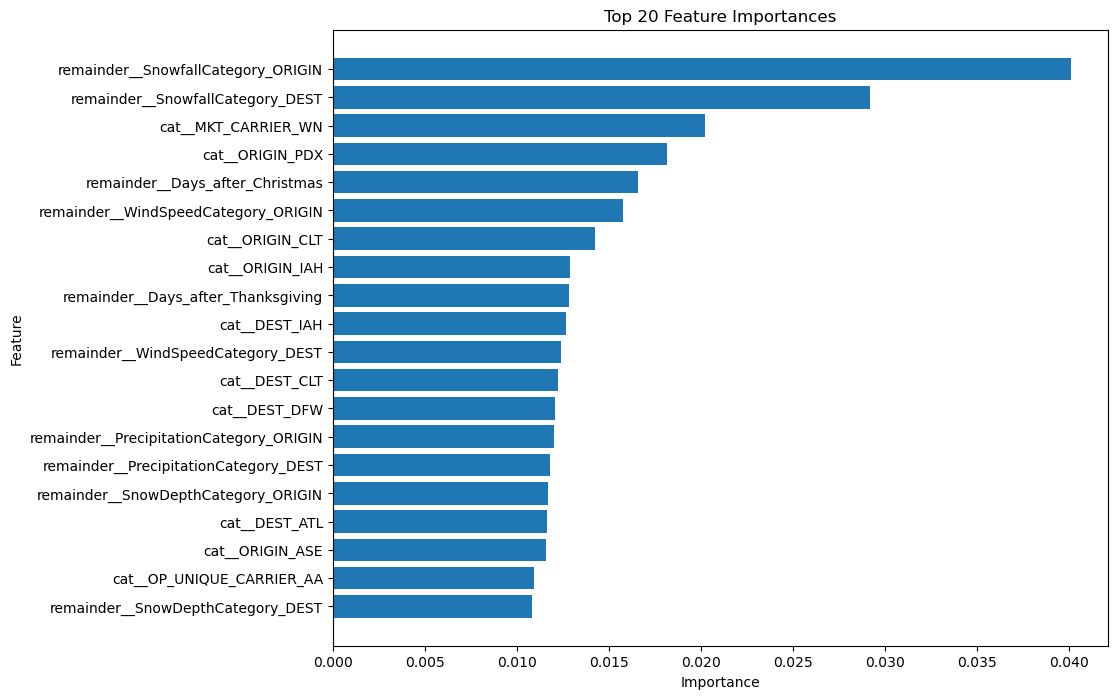

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = preprocessor.get_feature_names_out()
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

print(importance_df)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  
plt.show()

In [11]:
import pickle

with open('xgb_model_cancelled.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file) 


In [1]:
import pickle

with open('xgb_model_cancelled.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

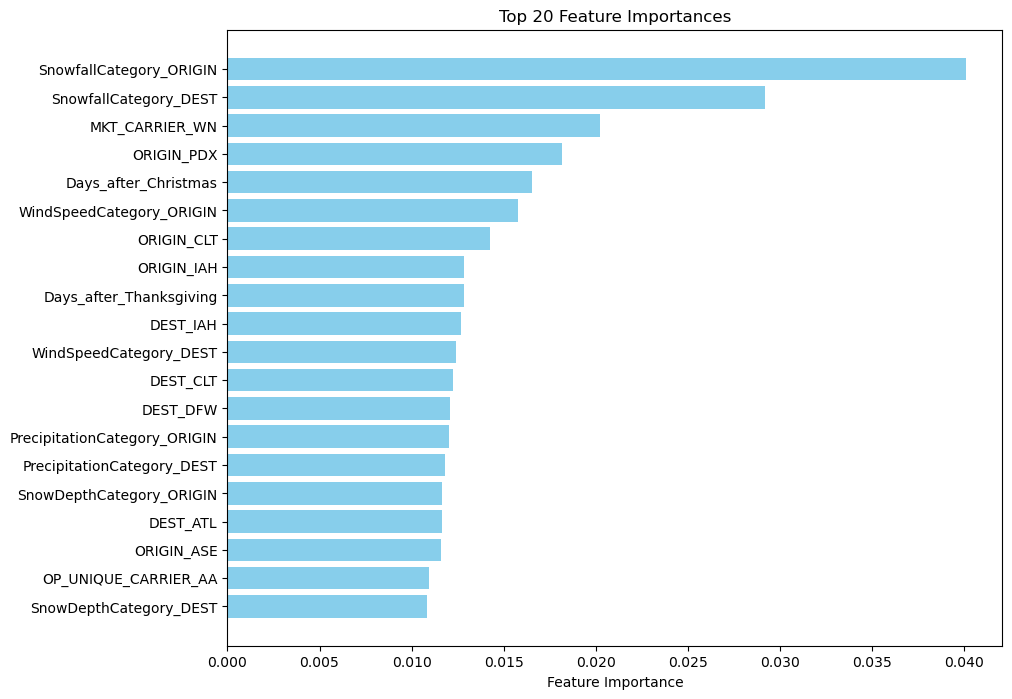

In [11]:
import matplotlib.pyplot as plt
import numpy as np
best_model = loaded_model

feature_importances = best_model.feature_importances_

encoded_categorical_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([encoded_categorical_features, numeric_features])

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
})

top_features = feature_importance_df.nlargest(20, 'Importance')

plt.figure(figsize=(10, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances")
plt.show()

In [6]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno 
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import os
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier
from scipy.sparse import csr_matrix

In [14]:
import os
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from xgboost import XGBClassifier

os.chdir(r"D:/Airplane/data")
alldata = df

y = alldata['CANCELLED']
X = alldata[['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER',
       'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DISTANCE', 'EXTREME_ORIGIN',
       'EXTREME_DEST', 'Days_after_Thanksgiving', 'Days_after_Christmas',
       'Days_after_New_Year', 'ParsedSkyCondition_ORIGIN',
       'ParsedSkyCondition_DEST', 'HumidityCategory_ORIGIN',
       'HumidityCategory_DEST', 'PressureCategory_ORIGIN',
       'PressureCategory_DEST', 'WetBulbTempCategory_ORIGIN',
       'WetBulbTempCategory_DEST', 'WindSpeedCategory_ORIGIN',
       'WindSpeedCategory_DEST', 'SnowDepthCategory_ORIGIN',
       'SnowDepthCategory_DEST', 'SnowfallCategory_ORIGIN',
       'SnowfallCategory_DEST', 'PrecipitationCategory_ORIGIN',
       'PrecipitationCategory_DEST', 'Timechange_CRS_DEP_Time',
       'Timechange_CRS_ARR_TIME']]

numeric_features = X.select_dtypes(exclude='object').columns
categorical_features = X.select_dtypes(include='object').columns

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  
)

X_preprocessed = preprocessor.fit_transform(X)
X_preprocessed = csr_matrix(X_preprocessed) 

best_model = XGBClassifier(n_estimators=90, max_depth=6, learning_rate=0.1,
                           objective='binary:logistic', verbosity=0, use_label_encoder=False)
best_model.fit(X_preprocessed, y)

y_pred = best_model.predict(X_preprocessed)
y_pred_proba = best_model.predict_proba(X_preprocessed)[:, 1]

accuracy = accuracy_score(y, y_pred)
auc_score = roc_auc_score(y, y_pred_proba)

print(f"Accuracy on full data: {accuracy:.3f}")
print(f"AUC on full data: {auc_score:.3f}")

Accuracy on full data: 0.982
AUC on full data: 0.873


In [16]:
import joblib

joblib.dump(preprocessor, 'preprocessor_cancelled.pkl')  

['preprocessor_cancelled.pkl']

In [4]:
import joblib
preprocessor = joblib.load('preprocessor_cancelled.pkl')  

In [3]:
import numpy as np
import pandas as pd

X_new = pd.DataFrame({'MONTH': 1, 'DAY_OF_MONTH': 1, 'DAY_OF_WEEK': 1, 'MKT_CARRIER': 'DL', 
                      'OP_UNIQUE_CARRIER': 'EV', 'ORIGIN': 'ATL', 'DEST': 'ABE', 'DISTANCE': 692.0,
                      'EXTREME_ORIGIN': np.nan, 'EXTREME_DEST': np.nan, 'Days_after_Thanksgiving': 39, 
                      'Days_after_Christmas': 7, 'Days_after_New_Year': 0, 'ParsedSkyCondition_ORIGIN': 2.0, 
                      'ParsedSkyCondition_DEST': np.nan, 'HumidityCategory_ORIGIN': 1, 'HumidityCategory_DEST': 1,
                      'PressureCategory_ORIGIN': 0, 'PressureCategory_DEST': 1, 'WetBulbTempCategory_ORIGIN': 0,
                      'WetBulbTempCategory_DEST': 0, 'WindSpeedCategory_ORIGIN': 1, 'WindSpeedCategory_DEST': 1, 
                      'SnowDepthCategory_ORIGIN': 0, 'SnowDepthCategory_DEST': np.nan, 'SnowfallCategory_ORIGIN': 0, 
                      'SnowfallCategory_DEST': 0, 'PrecipitationCategory_ORIGIN': np.nan, 'PrecipitationCategory_DEST': 0, 
                      'Timechange_CRS_DEP_Time': '14:05', 'Timechange_CRS_ARR_TIME': '16:10'},index = [0])

X_new_preprocessed = preprocessor.transform(X_new)

y_pred = loaded_model.predict(X_new_preprocessed)

y_pred_proba = loaded_model.predict_proba(X_new_preprocessed)[:, 1]

print("Predicted Labels:", y_pred)          
print("Predicted Probabilities:", y_pred_proba)  


Predicted Labels: [0]
Predicted Probabilities: [0.0131155]


In [3]:
import pickle

with open('xgb_model_cancelled.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

import joblib
preprocessor = joblib.load('preprocessor_cancelled.pkl')  # 加载 preprocessor

import numpy as np
import pandas as pd

X_new = pd.DataFrame({'MONTH': 1, 'DAY_OF_MONTH': 1, 'DAY_OF_WEEK': 1, 'MKT_CARRIER': 'DL', 
                      'OP_UNIQUE_CARRIER': 'EV', 'ORIGIN': 'ATL', 'DEST': 'ABE', 'DISTANCE': 692.0,
                      'EXTREME_ORIGIN': np.nan, 'EXTREME_DEST': np.nan, 'Days_after_Thanksgiving': 39, 
                      'Days_after_Christmas': 7, 'Days_after_New_Year': 0, 'ParsedSkyCondition_ORIGIN': 2.0, 
                      'ParsedSkyCondition_DEST': np.nan, 'HumidityCategory_ORIGIN': 1, 'HumidityCategory_DEST': 1,
                      'PressureCategory_ORIGIN': 0, 'PressureCategory_DEST': 1, 'WetBulbTempCategory_ORIGIN': 0,
                      'WetBulbTempCategory_DEST': 0, 'WindSpeedCategory_ORIGIN': 1, 'WindSpeedCategory_DEST': 1, 
                      'SnowDepthCategory_ORIGIN': 0, 'SnowDepthCategory_DEST': np.nan, 'SnowfallCategory_ORIGIN': 0, 
                      'SnowfallCategory_DEST': 0, 'PrecipitationCategory_ORIGIN': np.nan, 'PrecipitationCategory_DEST': 0, 
                      'Timechange_CRS_DEP_Time': '14:05', 'Timechange_CRS_ARR_TIME': '16:10'},index = [0])

X_new_preprocessed = preprocessor.transform(X_new)

y_pred = loaded_model.predict(X_new_preprocessed)

y_pred_proba = loaded_model.predict_proba(X_new_preprocessed)[:, 1]

print("Predicted Labels:", y_pred)           
print("Predicted Probabilities:", y_pred_proba)  


Predicted Labels: [0]
Predicted Probabilities: [0.0131155]
